In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt #used to generate the legends
from typing import List

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: prova3ranks
Current folders are:
prova3ranks.0
prova3ranks.1
prova3ranks.2


### uncomment to show all the rows in tables

In [2]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

# creation of firm dataframes

In [3]:
#each firm will have its dataframe
#containing the values of the names of the columns for all the time units (rows)
colNames=["firm class type", "initial inventories","total costs", "final inventories","profits", "added value",\
          "total production", "cost of production", "cost of unused factors","total lost production", \
          "total cost of lost production", "cost of labor", "cost of capital", "cost of substitution", "production type"]

#fileNameArray is the array that will contain the names of the file of the balance sheets (one file for each firm), 
#subdivided by ranks in the columns of the array; 'itemsize=len(fileNameRoot)+30' is supposed to be sufficient to 
#report the names of the file;
fileNameArray=np.chararray((ag0num, rankNum), itemsize=len(fileNameRoot)+30, unicode=True)

In [4]:
#operating by folders to load the names of the files reported in the balancesheetList files
for k in range(rankNum):
    #which folder
    os.chdir("../"+folder+"."+str(k))
    with open(fileNameRoot+"_balancesheetList_"+str(k)+".csv","r") as fileList:
        reader = csv.reader(fileList, delimiter = ',')
        #read the name of the files, containing _balancesheetList_, present in the current set of folders
        for row in reader:
            for i in range(len(row)):
                fileNameArray[i,k]=row[i]

                

In [5]:
#creating a dictionary of firm dataframes
firmData={}
for k in range(rankNum):
    #in the folder with name extension == k
    os.chdir("../"+folder+"."+str(k))
    #repeating for the number of agent type 0 in each folder
    for i in range(ag0num):
        #extracting the agent uid from the name of the file
        p1=fileNameArray[i,k].find('(')
        p2=fileNameArray[i,k].find(')')+1
        uid=fileNameArray[i,k][p1:p2]
        #filling the dictionary with uids as keys and the balancesheetLists of the related firm as values
        firmData[uid]=pd.read_csv(fileNameArray[i,k], header=None)

#naming the firm dataframe columns, firm by firm, by scrolling the keys of the dictionary
for aFirm in firmData.keys():
    firmData[aFirm].columns=colNames

# Retrieve a firm

In [6]:
#retrieve a firm with id and rank
def retrieveFirmBalancesheet(id,r):
    return firmData['('+str(id)+', 0, '+str(r)+')']

In [7]:
#example
retrieveFirmBalancesheet(1,0)

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,0.0,0.000000,176.318139,11.287156,-165.030983,11.287156,2.382448,8.009448,168.308691,0.0,0.0,79.0,53.082621,44.235518,1.0
1,0.0,11.287156,176.318139,30.374312,-157.230983,19.087156,4.426950,16.018895,160.299244,0.0,0.0,79.0,53.082621,44.235518,1.0
2,0.0,30.374312,176.318139,49.736697,-156.955754,19.362385,5.125447,18.688711,157.629428,0.0,0.0,79.0,53.082621,44.235518,1.0
3,0.0,49.736697,176.318139,98.035779,-128.019057,48.299082,11.267702,40.047238,136.270901,0.0,0.0,79.0,53.082621,44.235518,1.0
4,0.0,98.035779,176.318139,178.422017,-95.931901,80.386238,19.900210,69.415213,106.902926,0.0,0.0,79.0,53.082621,44.235518,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,14529.617858,181.667605,14682.028697,-29.256765,152.410840,42.678541,166.169841,15.497764,0.0,0.0,61.0,65.818694,54.848911,1.0
96,0.0,14682.028697,181.667605,14820.196178,-43.500124,138.167481,41.067565,157.574849,24.092755,0.0,0.0,61.0,65.818694,54.848911,1.0
97,0.0,14820.196178,181.667605,14984.250377,-17.613407,164.054198,45.504411,171.899836,9.767769,0.0,0.0,61.0,65.818694,54.848911,1.0
98,0.0,14984.250377,181.667605,15127.617858,-38.300124,143.367481,43.453887,163.304844,18.362761,0.0,0.0,61.0,65.818694,54.848911,1.0


# The allFirmData dataframe

In [8]:
#create a dataframe summing up all the firm dataframes
allFirmData=firmData[list(firmData.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                      #independent copy with a new name

for aFirmUid in list(firmData.keys())[1:]: #from the second to the last
    allFirmData=allFirmData.add(firmData[aFirmUid])

allFirmData.__description__="all firms"

In [9]:
allFirmData

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,645.0,0.000000e+00,14812.785136,3.944746e+03,-10868.039547,3944.745589,826.938009,2854.828832,11957.956304,0.0,0.0,6167.0,4715.882801,3929.902334,30.0
1,645.0,3.944746e+03,14812.785136,1.050432e+04,-8253.207816,6559.577320,1646.810429,5664.458306,9148.326830,0.0,0.0,6167.0,4715.882801,3929.902334,30.0
2,645.0,1.050432e+04,14812.785136,1.818076e+04,-7136.344063,7676.441072,2140.409895,7381.387158,7431.397978,0.0,0.0,6167.0,4715.882801,3929.902334,30.0
3,645.0,1.818076e+04,14812.785136,2.684777e+04,-6145.775880,8667.009256,2495.608387,8669.341652,6143.443484,0.0,0.0,6167.0,4715.882801,3929.902334,30.0
4,645.0,2.684777e+04,14812.785136,3.582492e+04,-5835.641987,8977.143149,2654.529572,9290.763534,5522.021601,0.0,0.0,6167.0,4715.882801,3929.902334,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,645.0,1.498693e+06,20925.481041,1.516990e+06,-2628.326707,18297.154335,5674.363469,17934.693826,2990.787216,0.0,0.0,9363.0,7400.356905,4164.280228,30.0
96,645.0,1.516990e+06,21016.951580,1.535077e+06,-2930.090826,18086.860754,5642.464403,17977.556318,3039.395262,0.0,0.0,9335.0,7412.215186,4253.594675,30.0
97,645.0,1.535077e+06,21139.557533,1.553210e+06,-3005.901118,18133.656414,5654.472117,18122.267849,3017.289684,0.0,0.0,9335.0,7423.701694,4392.342346,30.0
98,645.0,1.553210e+06,21105.469768,1.570850e+06,-3465.708291,17639.761477,5630.006363,17964.109460,3141.360308,0.0,0.0,9307.0,7429.484175,4346.768074,30.0


In [10]:
allFirmData.__description__

'all firms'

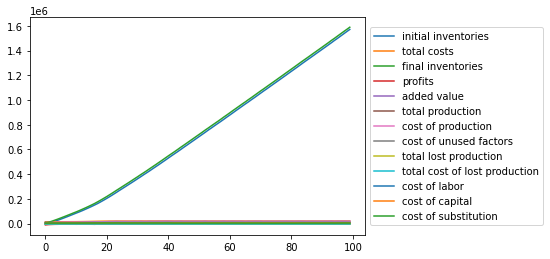

In [11]:
allFirmData.drop(['firm class type', 'production type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

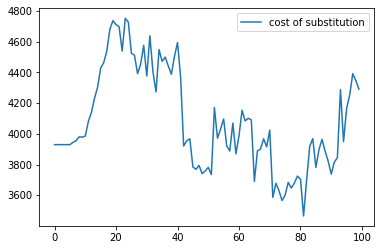

In [12]:
allFirmData[['cost of substitution']].plot()

<AxesSubplot: >

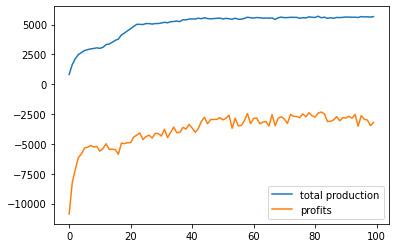

In [13]:
allFirmData[['total production', 'profits']].plot()

<AxesSubplot: >

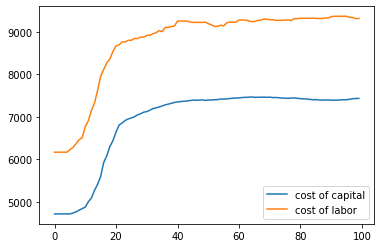

In [14]:
allFirmData[['cost of capital','cost of labor']].plot()

# Considering groups of firms

In [15]:
#summarize a subset of balancesheets of firm with 'dimensional class' in a given list
def sumBalancesheetsWithAGivenDimensionalClass(dimClassList: List):
    tmpDict={}
    for aFirmUid in list(firmData.keys())[:]:
        if firmData[aFirmUid]['firm class type'].loc[0] in dimClassList:
            tmpDict[aFirmUid]=firmData[aFirmUid]
    print("found",len(tmpDict), "firms")
    
    if tmpDict=={}: return 0 #firms with the required dimensional class: not found
        
    allLocalFirmData=tmpDict[list(tmpDict.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                              #independent copy with a new name

    for aFirmUid in list(tmpDict.keys())[1:]: #from the second to the last
        allLocalFirmData=allLocalFirmData.add(tmpDict[aFirmUid])

    memo="firms of groups"
    for g in dimClassList: memo = memo +" "+str(g)
    allLocalFirmData.__description__= memo
    
    return allLocalFirmData


In [16]:
#example with dimensional class 0
sumOfBalanceSheetSubset = sumBalancesheetsWithAGivenDimensionalClass([0])

found 30 firms


In [17]:
sumOfBalanceSheetSubset.__description__

'firms of groups 0'

In [18]:
sumOfBalanceSheetSubset

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,0.0,0.000000,5440.177704,1138.769562,-4301.408142,1138.769562,214.139793,784.955308,4655.222396,0.0,0.0,2021.0,1865.006020,1554.171684,30.0
1,0.0,1138.769562,5440.177704,3008.912165,-3570.035102,1870.142603,427.153922,1572.410501,3867.767203,0.0,0.0,2021.0,1865.006020,1554.171684,30.0
2,0.0,3008.912165,5440.177704,5384.563323,-3064.526546,2375.651158,597.620504,2206.131086,3234.046618,0.0,0.0,2021.0,1865.006020,1554.171684,30.0
3,0.0,5384.563323,5440.177704,8522.082213,-2302.658814,3137.518890,800.992914,2958.066983,2482.110721,0.0,0.0,2021.0,1865.006020,1554.171684,30.0
4,0.0,8522.082213,5440.177704,12212.042935,-1750.216982,3689.960722,975.965858,3605.542899,1834.634805,0.0,0.0,2021.0,1865.006020,1554.171684,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,438801.941860,5237.146589,443904.692986,-134.395462,5102.751127,1413.372843,4898.414163,338.732426,0.0,0.0,1965.0,2061.245254,1222.660111,30.0
96,0.0,443904.692986,5412.890475,449083.097329,-234.486133,5178.404342,1408.746480,5056.540350,356.350125,0.0,0.0,1975.0,2063.188718,1386.645222,30.0
97,0.0,449083.097329,5429.999410,454071.680799,-441.415940,4988.583470,1436.385513,5137.985174,292.014236,0.0,0.0,1975.0,2066.614959,1391.810692,30.0
98,0.0,454071.680799,5436.460373,458969.751631,-538.389541,4898.070832,1424.120548,5095.008066,341.452308,0.0,0.0,1975.0,2067.503556,1394.845414,30.0


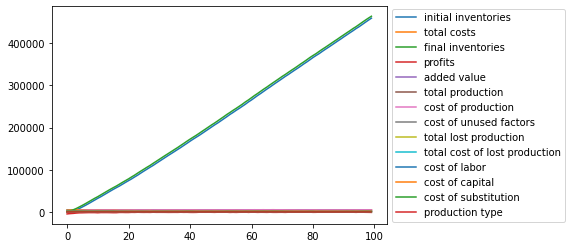

In [19]:
sumOfBalanceSheetSubset.drop(['firm class type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

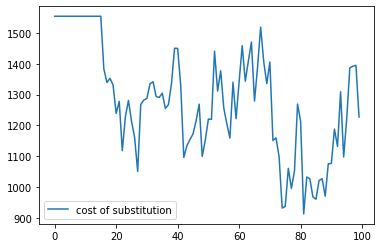

In [20]:
sumOfBalanceSheetSubset[['cost of substitution']].plot()

<AxesSubplot: >

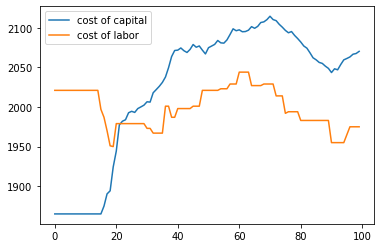

In [21]:
sumOfBalanceSheetSubset[['cost of capital', 'cost of labor']].plot()

# The National Economic Balance Table

In [22]:
allFirmData[['initial inventories', 'added value', 'final inventories']]

,initial inventories,added value,final inventories
0,0.000000e+00,3944.745589,3.944746e+03
1,3.944746e+03,6559.577320,1.050432e+04
2,1.050432e+04,7676.441072,1.818076e+04
3,1.818076e+04,8667.009256,2.684777e+04
4,2.684777e+04,8977.143149,3.582492e+04
...,...,...,...
95,1.498693e+06,18297.154335,1.516990e+06
96,1.516990e+06,18086.860754,1.535077e+06
97,1.535077e+06,18133.656414,1.553210e+06
98,1.553210e+06,17639.761477,1.570850e+06
